In [1]:
from scipy.integrate import dblquad, nquad
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
cm = plt.cm.viridis

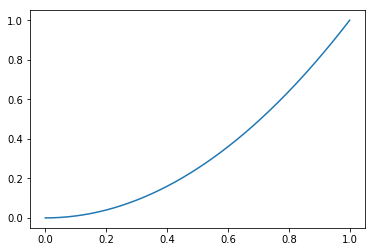

In [2]:
x = np.linspace(0,1,200)
plt.plot(x,x**2)

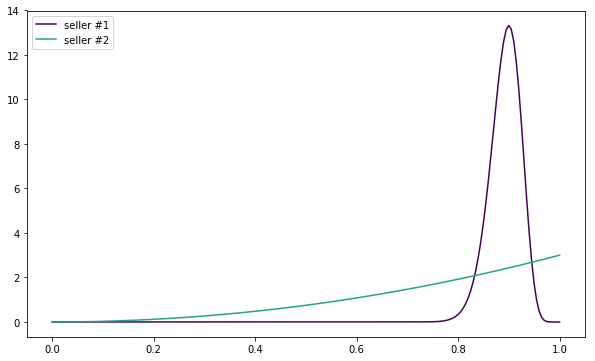

In [3]:
plt.figure(figsize=(10,6), )
plt.plot(x, beta.pdf(x, 91, 11), c=cm(0), label='seller #1')
plt.plot(x, beta.pdf(x, 3, 1), c=cm(150), label='seller #2')
plt.legend()

## Define integrand
Goal: Calculate the value of $$\int_0^1 \int_0^1 [\theta_1 > \theta_2] \ \ Beta(\theta_1,91,11) \ \ Beta(\theta_2,3,1) \ \ d\theta_1d\theta_2$$

In [4]:
def f(theta1,theta2):
    return beta.pdf(theta1, 91, 11)*beta.pdf(theta2, 3, 1)

## Exact numerical integration

In [5]:
print(nquad(lambda x,y: (x>y)*f(x,y), [[0,1],[0,1]], opts={'limit':10}))

/usr/local/lib/python3.6/dist-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (10) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


(0.7125647241254756, 0.04257895465244699)


In [6]:
exact, err = dblquad(lambda x,y: f(x,y), 0, 1, lambda x: x, lambda x: 1)
print(exact, err)

0.7125928041119365 1.8296501031259127e-08


## Monte Carlo style

### Idea: 

- Generate 10000 realizations of $\theta_1$ and 10000 realizations of $\theta_2$ 
- Calculate frequency of  $\theta_1$ being greater than  $\theta_2$

Allows us to integrate high-dimensional funtions efficiently.
Easy to implement.

In [7]:
samples_theta1 = beta.rvs(91, 11, size=10000000)
samples_theta2 = beta.rvs(3, 1, size=10000000)
print(np.mean(samples_theta1>samples_theta2))

0.7125905


### Repeat multiple times to check variance of our estimate

In [8]:
def sample(n = 7500, size = 1500):
    estimates = [] 
    for i in range(n):
        samples_theta1 = beta.rvs(91, 11, size=size)
        samples_theta2 = beta.rvs(3, 1, size=size)
        estimates.append(np.mean(samples_theta1>samples_theta2))
    return estimates

In [9]:
e = sample()

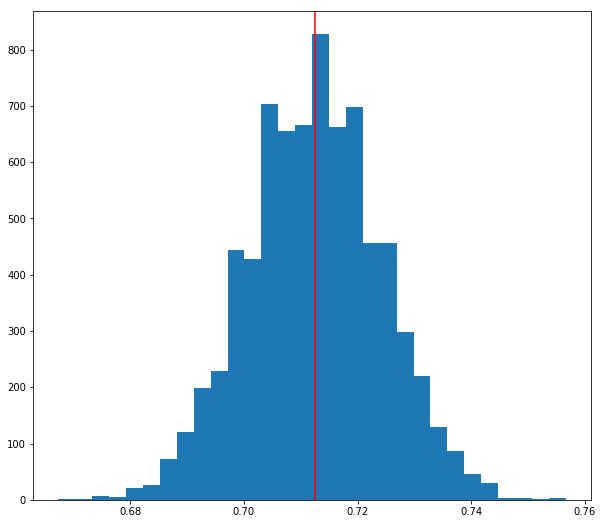

var:  0.00013561811098074082


In [10]:
plt.figure(figsize=(10,9))
h1 = plt.hist(e, 30)
plt.axvline(exact, c='r')
plt.show()
print('var: ', np.var(e))